Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report. 

In [1]:
%matplotlib inline

from os import environ
from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

**This cell will not run until you fill in a taxonomic level (``2`` through ``7``).**

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "mock-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  ]

## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = int(environ['taxonomic_level'])

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 10

In [3]:
# Define the subdirectories where the query mock community data should be, and confirm that they exist.
mock_results_dirs = [join(results_dir,"mock-community") for results_dir in results_dirs]

for mock_results_dir in mock_results_dirs:
    assert exists(mock_results_dir), "Mock community result directory doesn't exist: %s" % mock_results_dir


Find mock community pre-computed tables, expected tables, and "query" tables
----------------------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [4]:
results = []
for mock_results_dir in mock_results_dirs:
    results += find_and_process_result_tables(mock_results_dir)

In [5]:
expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)

In [6]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

Evalution 1: Compute and summarize precision, recall, and F-measure for mock communities
----------------------------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the mock communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures. 

This is a qualitative evaluation, effectively telling us about the ability of the different methods to report the taxa that are present in each sample. These metrics are not concerned with the abundance of the different taxa.

In [7]:
mock_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count)

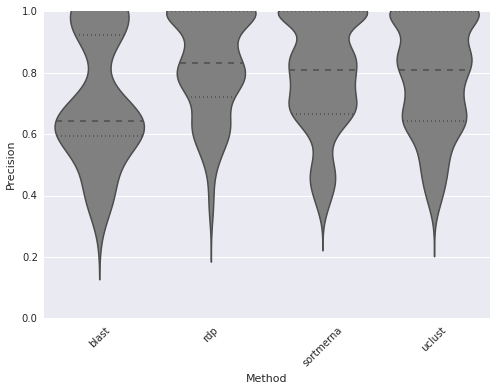

In [8]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Precision")

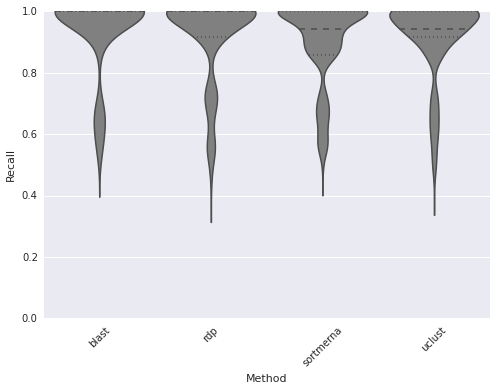

In [9]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Recall")

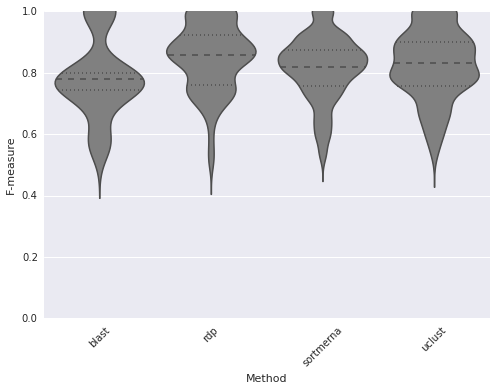

In [10]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="F-measure")

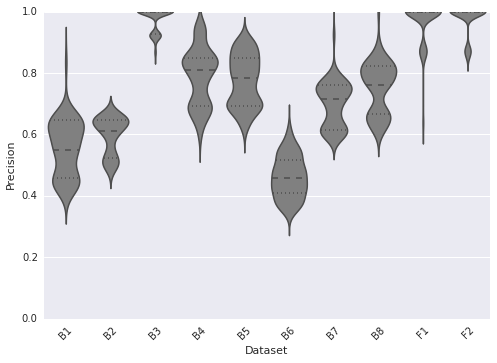

In [11]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="Precision")

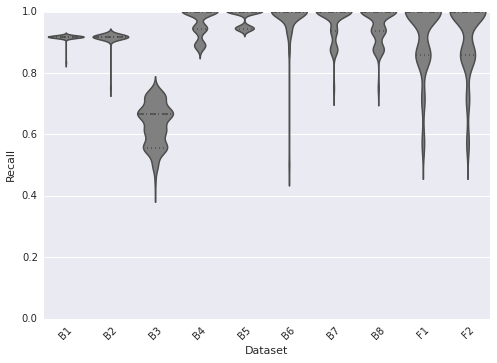

In [12]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="Recall")

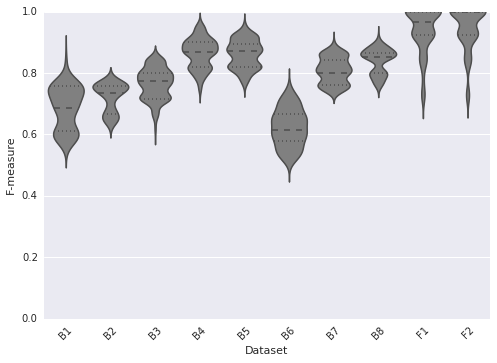

In [13]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="F-measure")

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


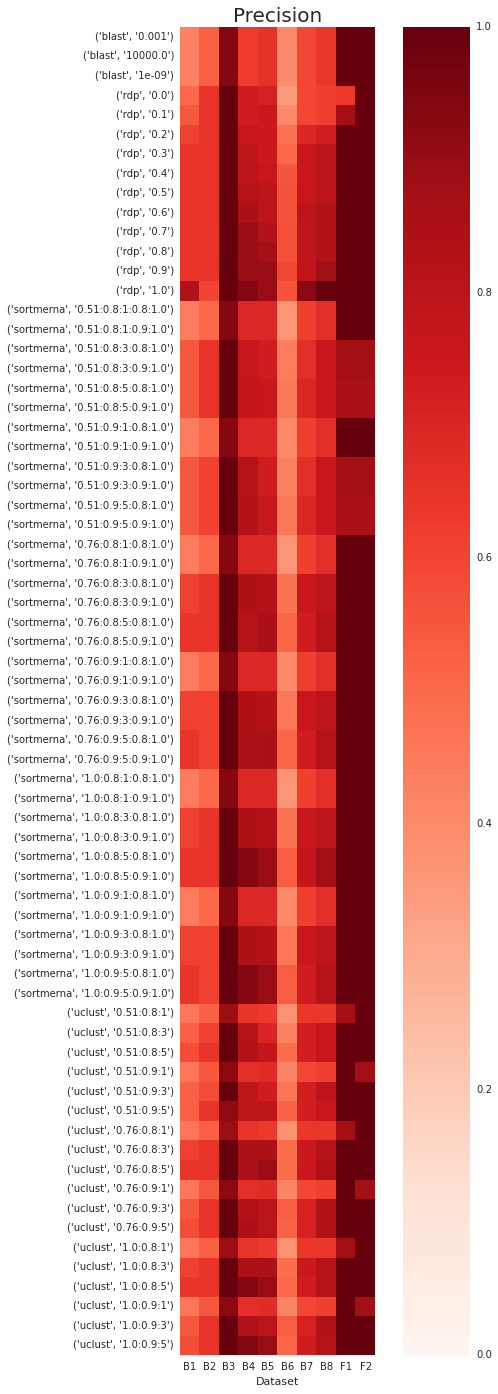

In [14]:
heatmap_from_data_frame(mock_results, "Precision")

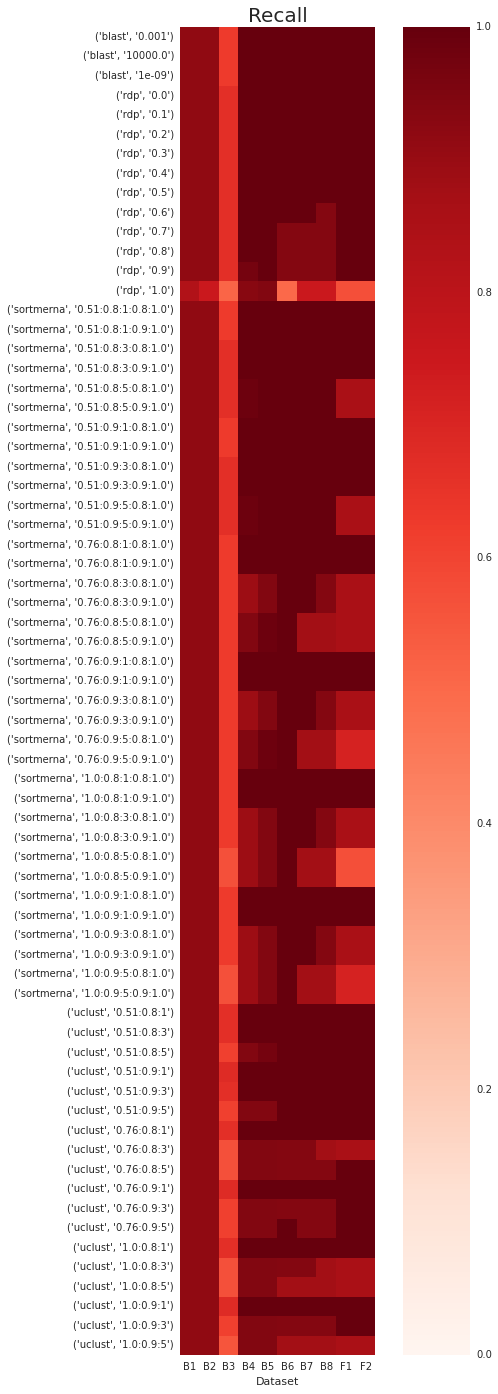

In [15]:
heatmap_from_data_frame(mock_results, "Recall")

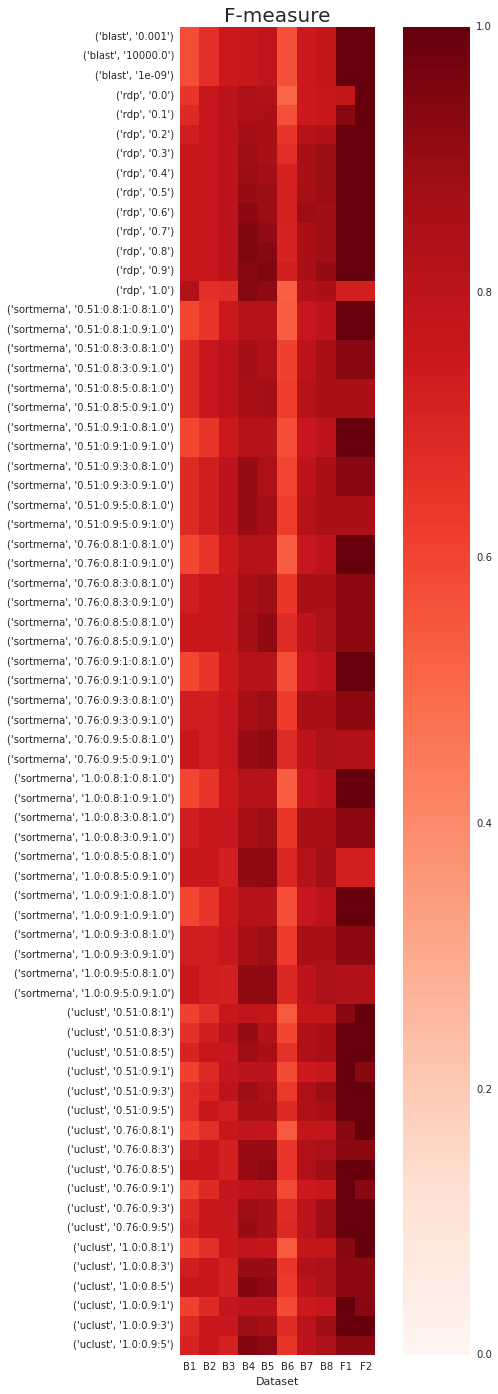

In [16]:
heatmap_from_data_frame(mock_results, "F-measure")

In [17]:
method_by_dataset_a1(mock_results, 'B1')

Method  Precision    Recall  F-measure
1944        rdp   0.833333  0.833333   0.833333
1904  sortmerna   0.647059  0.916667   0.758621
1970     uclust   0.647059  0.916667   0.758621
1940      blast   0.423077  0.916667   0.578947

In [18]:
method_by_dataset_a1(mock_results, 'B2')

Method  Precision    Recall  F-measure
34  sortmerna   0.647059  0.916667   0.758621
39        rdp   0.647059  0.916667   0.758621
50     uclust   0.647059  0.916667   0.758621
36      blast   0.523810  0.916667   0.666667

In [19]:
method_by_dataset_a1(mock_results, 'B3')

Method  Precision    Recall  F-measure
837        rdp   1.000000  0.722222   0.838710
793  sortmerna   1.000000  0.722222   0.838710
897     uclust   1.000000  0.722222   0.838710
833      blast   0.923077  0.666667   0.774194

In [20]:
method_by_dataset_a1(mock_results, 'B4')

Method  Precision    Recall  F-measure
1621        rdp   0.900000  1.000000   0.947368
1688     uclust   0.944444  0.944444   0.944444
1474  sortmerna   0.857143  1.000000   0.923077
1583      blast   0.642857  1.000000   0.782609

In [21]:
method_by_dataset_a1(mock_results, 'B5')

Method  Precision    Recall  F-measure
1126        rdp   0.900000  1.000000   0.947368
953   sortmerna   0.857143  1.000000   0.923077
1182     uclust   0.894737  0.944444   0.918919
1103      blast   0.666667  1.000000   0.800000

In [22]:
method_by_dataset_a1(mock_results, 'B6')

Method  Precision  Recall  F-measure
607        rdp   0.625000  0.9375   0.750000
580  sortmerna   0.551724  1.0000   0.711111
637     uclust   0.551724  1.0000   0.711111
592      blast   0.410256  1.0000   0.581818

In [23]:
method_by_dataset_a1(mock_results, 'B7')

Method  Precision  Recall  F-measure
210        rdp   0.800000       1   0.888889
158  sortmerna   0.761905       1   0.864865
230     uclust   0.727273       1   0.842105
176      blast   0.592593       1   0.744186

In [24]:
method_by_dataset_a1(mock_results, 'B8')

Method  Precision  Recall  F-measure
401        rdp   0.882353  0.9375   0.909091
435     uclust   0.800000  1.0000   0.888889
371  sortmerna   0.875000  0.8750   0.875000
380      blast   0.640000  1.0000   0.780488

In [25]:
method_by_dataset_a1(mock_results, 'F1')

Method  Precision  Recall  F-measure
1879     uclust          1       1          1
1779  sortmerna          1       1          1
1837        rdp          1       1          1
1813      blast          1       1          1

In [26]:
method_by_dataset_a1(mock_results, 'F2')

Method  Precision  Recall  F-measure
1406     uclust          1       1          1
1372        rdp          1       1          1
1322  sortmerna          1       1          1
1340      blast          1       1          1

Evaluation 2: Compute and summarize correlations between observed and known mock community structure
----------------------------------------------------------------------------------------------------

In this evaluation, we compute and summarize the correlation between each result (pre-computed and query) and the known composition of the mock communities. We then summarize the results in two ways: first with a series of boxplots of correlation coefficients by method; and second with a table of the top methods based on their Pearson correlation coefficient. 

This is a quantitative evaluation, which tells us about the ability of the different methods to report the taxa that are present in each sample and accurately assess their abundance. Because many factors can affect the observed abundance of taxa beyond the accuracy of the taxonomic assigner (e.g., primer bias), the correlation coefficients are frequently low, but we expect that their relative values are informative in understanding which taxonomic assigners are more correct than others.

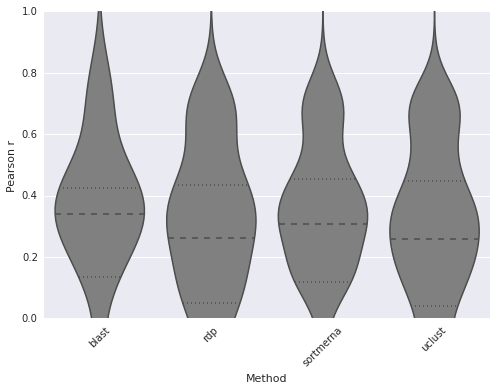

In [27]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Pearson r")

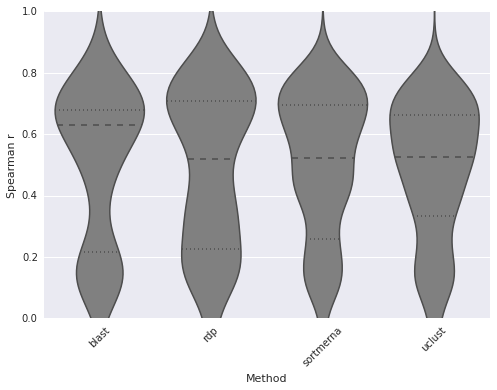

In [28]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Spearman r")

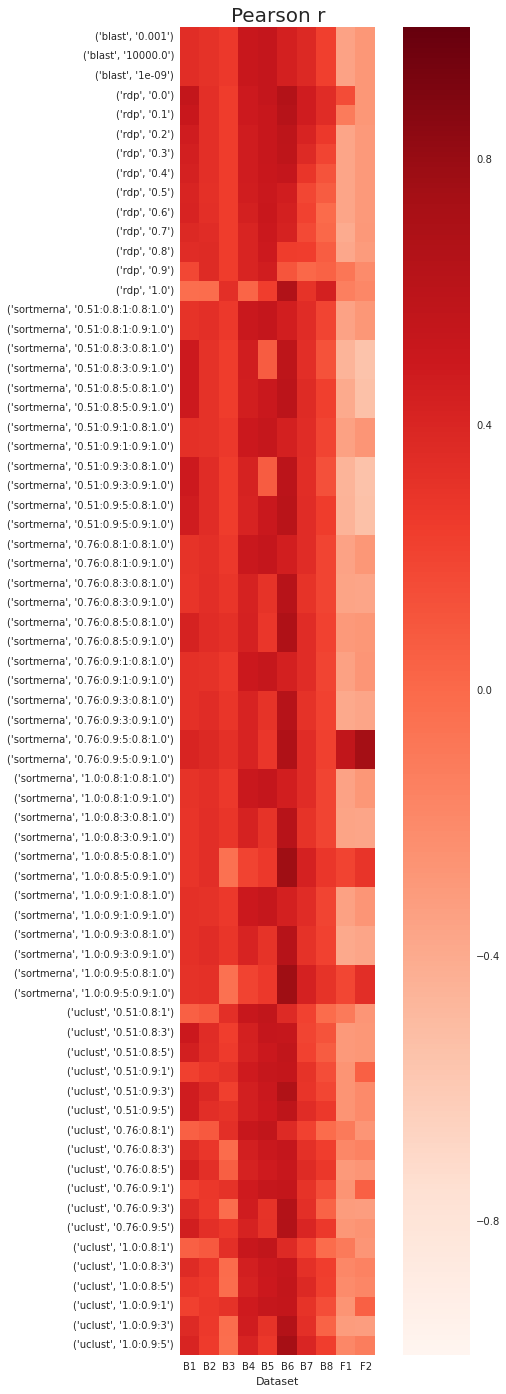

In [29]:
heatmap_from_data_frame(mock_results, "Pearson r", vmin=-1, vmax=1)

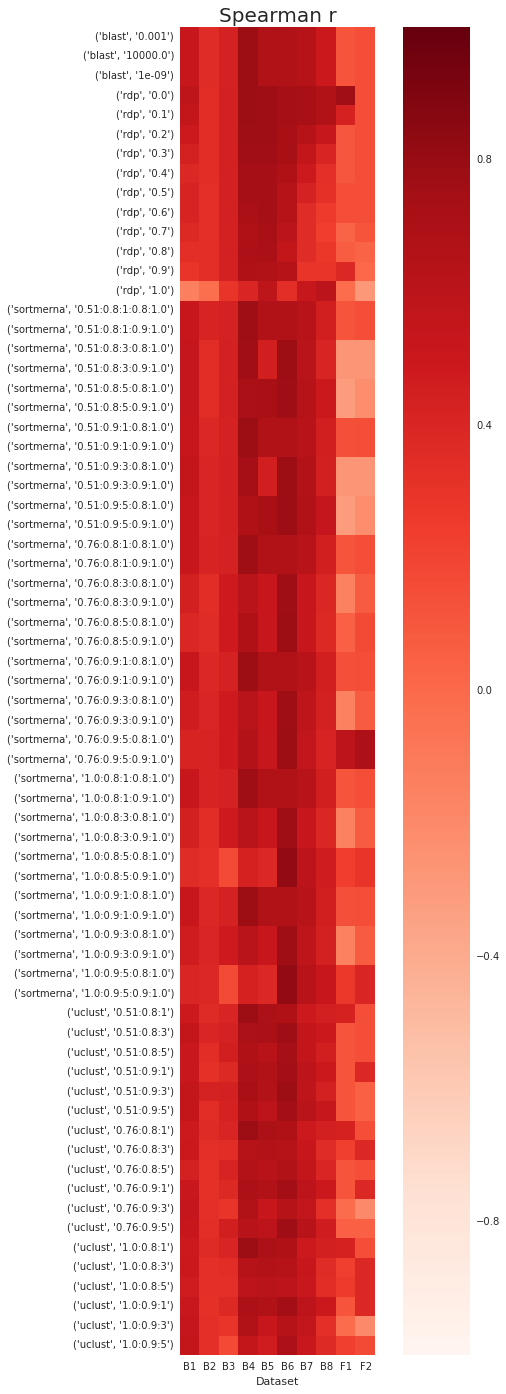

In [30]:
heatmap_from_data_frame(mock_results, "Spearman r", vmin=-1, vmax=1)

In [31]:
method_by_dataset_a2(mock_results, 'B1')

Method  Pearson r  Spearman r
1950        rdp   0.547209    0.590460
1967     uclust   0.499197    0.561473
1928  sortmerna   0.488542    0.544836
1940      blast   0.347693    0.526938

In [32]:
method_by_dataset_a2(mock_results, 'B2')

Method  Pearson r  Spearman r
54     uclust   0.390066    0.436198
0   sortmerna   0.375726    0.417671
48        rdp   0.359724    0.338966
37      blast   0.316634    0.357409

In [33]:
method_by_dataset_a2(mock_results, 'B3')

Method  Pearson r  Spearman r
703  sortmerna   0.481743    0.708651
923     uclust   0.468546    0.585097
879        rdp   0.433946    0.708651
835      blast   0.433946    0.708651

In [34]:
method_by_dataset_a2(mock_results, 'B4')

Method  Pearson r  Spearman r
1532  sortmerna   0.723330    0.781104
1668     uclust   0.716178    0.758376
1572      blast   0.714192    0.755300
1604        rdp   0.707692    0.809122

In [35]:
method_by_dataset_a2(mock_results, 'B5')

Method  Pearson r  Spearman r
1156     uclust   0.731501    0.673391
992   sortmerna   0.730121    0.722108
1096      blast   0.729155    0.676214
1140        rdp   0.718521    0.815107

In [36]:
method_by_dataset_a2(mock_results, 'B6')

Method  Pearson r  Spearman r
579  sortmerna   0.783338    0.843446
597        rdp   0.752514    0.321332
672     uclust   0.742160    0.708335
585      blast   0.451041    0.688858

In [37]:
method_by_dataset_a2(mock_results, 'B7')

Method  Pearson r  Spearman r
206        rdp   0.508346    0.719072
170  sortmerna   0.501536    0.627803
263     uclust   0.474710    0.537827
182      blast   0.419880    0.678358

In [38]:
method_by_dataset_a2(mock_results, 'B8')

Method  Pearson r  Spearman r
393        rdp   0.619763    0.627190
324  sortmerna   0.393427    0.577635
471     uclust   0.344853    0.384617
381      blast   0.270722    0.505428

In [39]:
method_by_dataset_a2(mock_results, 'F1')

Method  Pearson r  Spearman r
1702  sortmerna   0.604880    0.661724
1840        rdp   0.178400    0.758985
1882     uclust  -0.068706    0.425532
1813      blast  -0.319074    0.115728

In [40]:
method_by_dataset_a2(mock_results, 'F2')

Method  Pearson r  Spearman r
1225  sortmerna   0.785340    0.739574
1382     uclust   0.100354    0.400501
1355        rdp  -0.128026   -0.077152
1340      blast  -0.235954    0.154303